# Recommended Screening Algorithm
I tested a Support Vector Machine (SVM) classifier and a Gaussian Naive Bayes (GNB) classifier to determine which did a better job at classifying tumors. 

**Here were my steps to determine which algorithm was best:**
1. Examined the dataset.
    - Determined which variables had discriminatory power when classifying tumors by looking at their distributions
    - Determined if the dataset was a good candidate for PCA using a correlation matrix
2. Used SVM and GNB classifiers with the 2 variables I identified and evaluated each model's performance
3. Used PCA to reduce the dimensionality of the dataset, used the SVM and GNB classifiers, and evaluated their performance again
4. Determined the best screening algorithm based on the results

**Important note on my decision:**
In cases of life or death, such as when diagnosing someone with cancer, it's better to prioritize recall over precision because it would be better to diagnose someone with a tumor when they don't have one than to not diagnose someone who does have a tumor. In this case if you were to have high precision (assuming malignant is the positive case or what we're most concerned with identifying), then you would be very certain of an accurate diagnosis when you diagnose someone with cancer. In contrast, if you were to have high recall, you would know that you are accurately diagnosing the highest proportion of people with cancerous tumors as possible, although there may be a few false positives thrown in there. However, you also don't want to inaccurately diagnose lots of people with cancer for the sake of accurately diagnosing one person with cancer because this diagnosis will likely drastically alter someone's life as they undergo treatment for cancer they don't have. Therefore, recall may be slightly more important in this scenario, but balance between recall and precision should still be maintained.

**View my analyses and results below.**

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [6]:
bcd = pd.read_csv("data/FP_breast_cancer_data_catcol.csv")
print('Here is the dataset I used to classify tumor type:')
bcd

Here is the dataset I used to classify tumor type:


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst perimeter  worst area  \
0                   0.07871  ...           184.60      2019.0   
1                   0.05667  ...           158.80      1956.0   
2                   0.05999  ...           152.50      1709.0   
3                   0.09744  ...            98.87       567.7   
4                   0.05883  ...           152.20      1575.0   
..                      ...  ...              ...         ...   
564                 0.05623  ...           166.10      2027.0   
565                 0.05533  ...           155.00      1731.0   
566                 0.05648  ...           126.70      1124.0   
567                 0.07016  ...           184.60      1821.0   
568                 0.05884  ...            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  \
0                  0.2654          0.4601                  0.11890       0   
1                  0.1860          0.2750                  0.08902       0   
2                  0.2430          0.3613                  0.08758       0   
3                  0.2575          0.6638                  0.17300       0   
4                  0.1625          0.2364                  0.07678       0   
..                    ...             ...                      ...     ...   
564                0.2216          0.2060                  0.07115       0   
565  

## Examing the data

**Determining 2 variables with discriminatory power when classifying tumors**

I looked for two variables that were good at distinguishing malignant and benign tumors independently. When a variable was good at distinguishing between tumor types, there was little overlap between the benign and malignant kde plots. When used in combination, these 2 variables should be good at preditcing malignant vs. benign tumors

For time's sake, no need to look at all of these pairplots. Just look at the pairplot below for the 2 variables I selected.

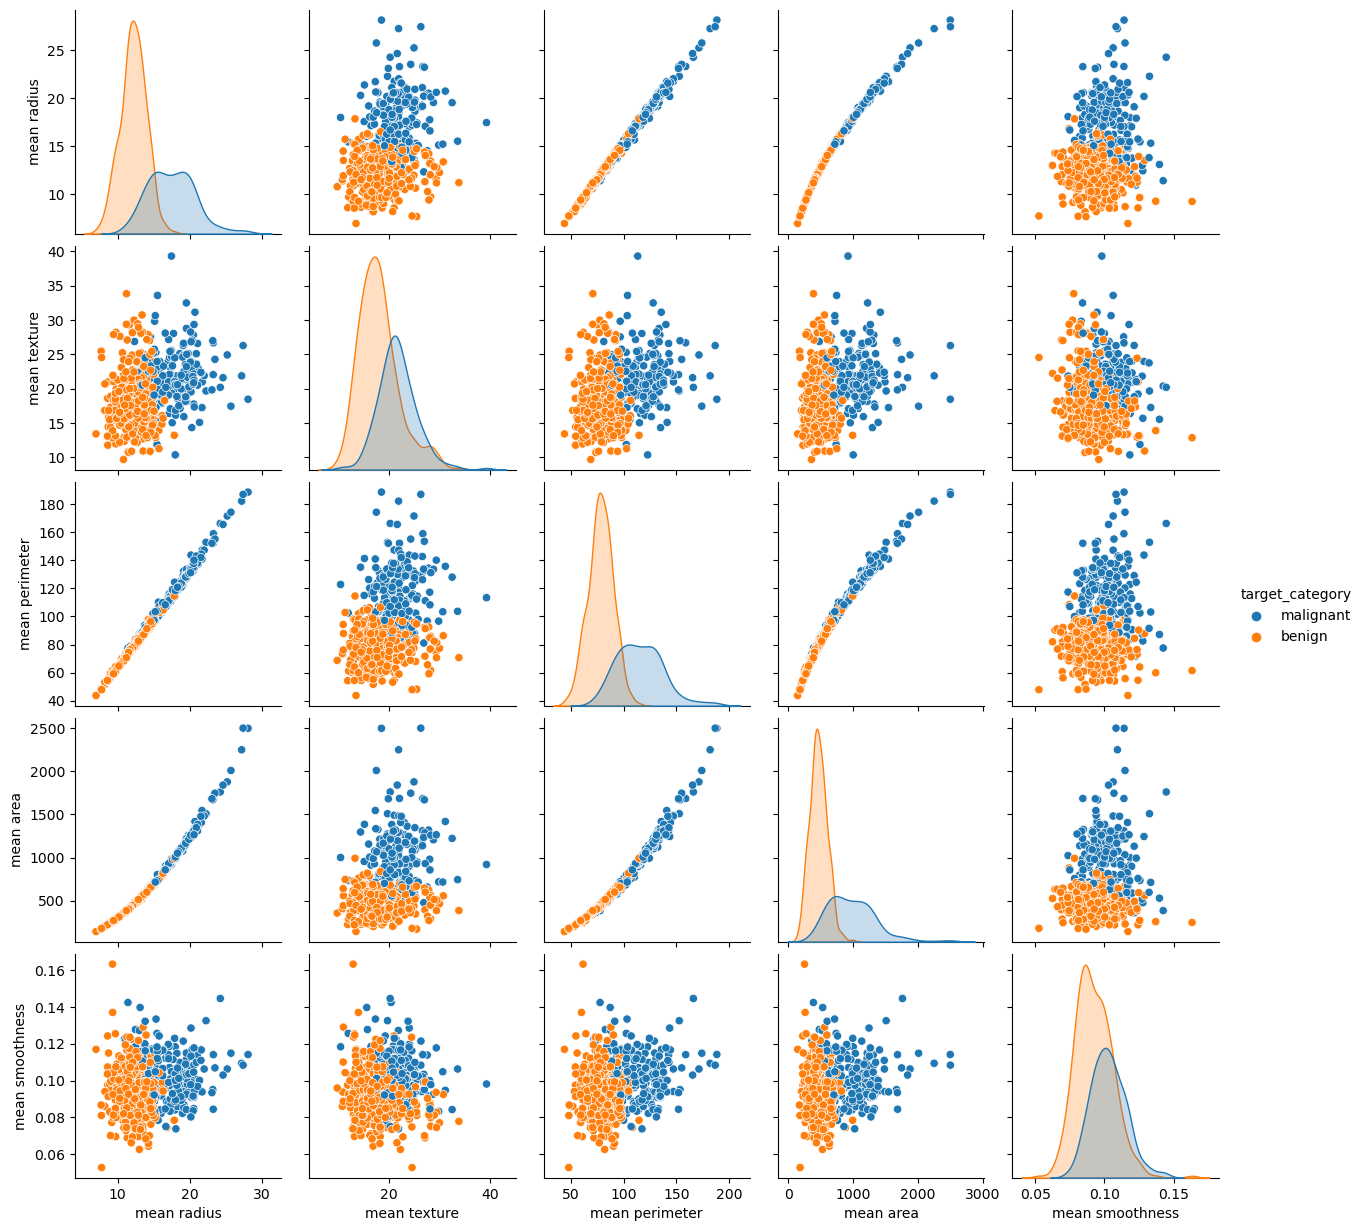

In [5]:
sns.pairplot(
    bcd[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'target_category']],
    hue='target_category')

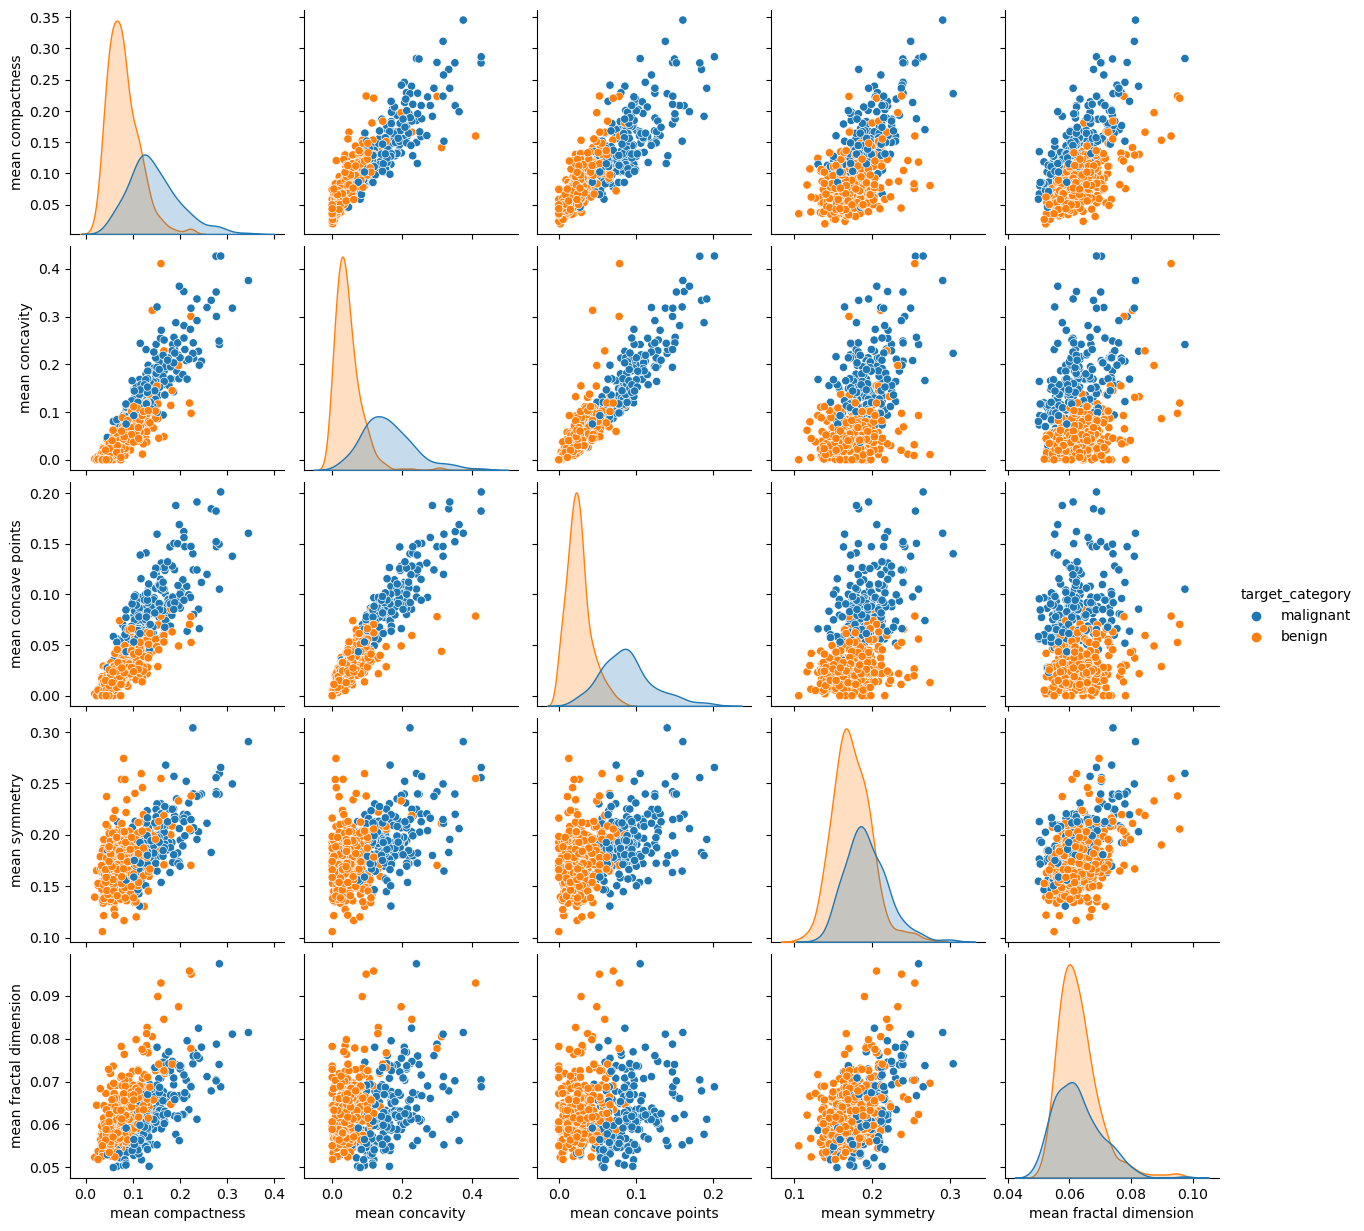

In [8]:
sns.pairplot(
    bcd[['mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension', 'target_category']],
    hue='target_category')

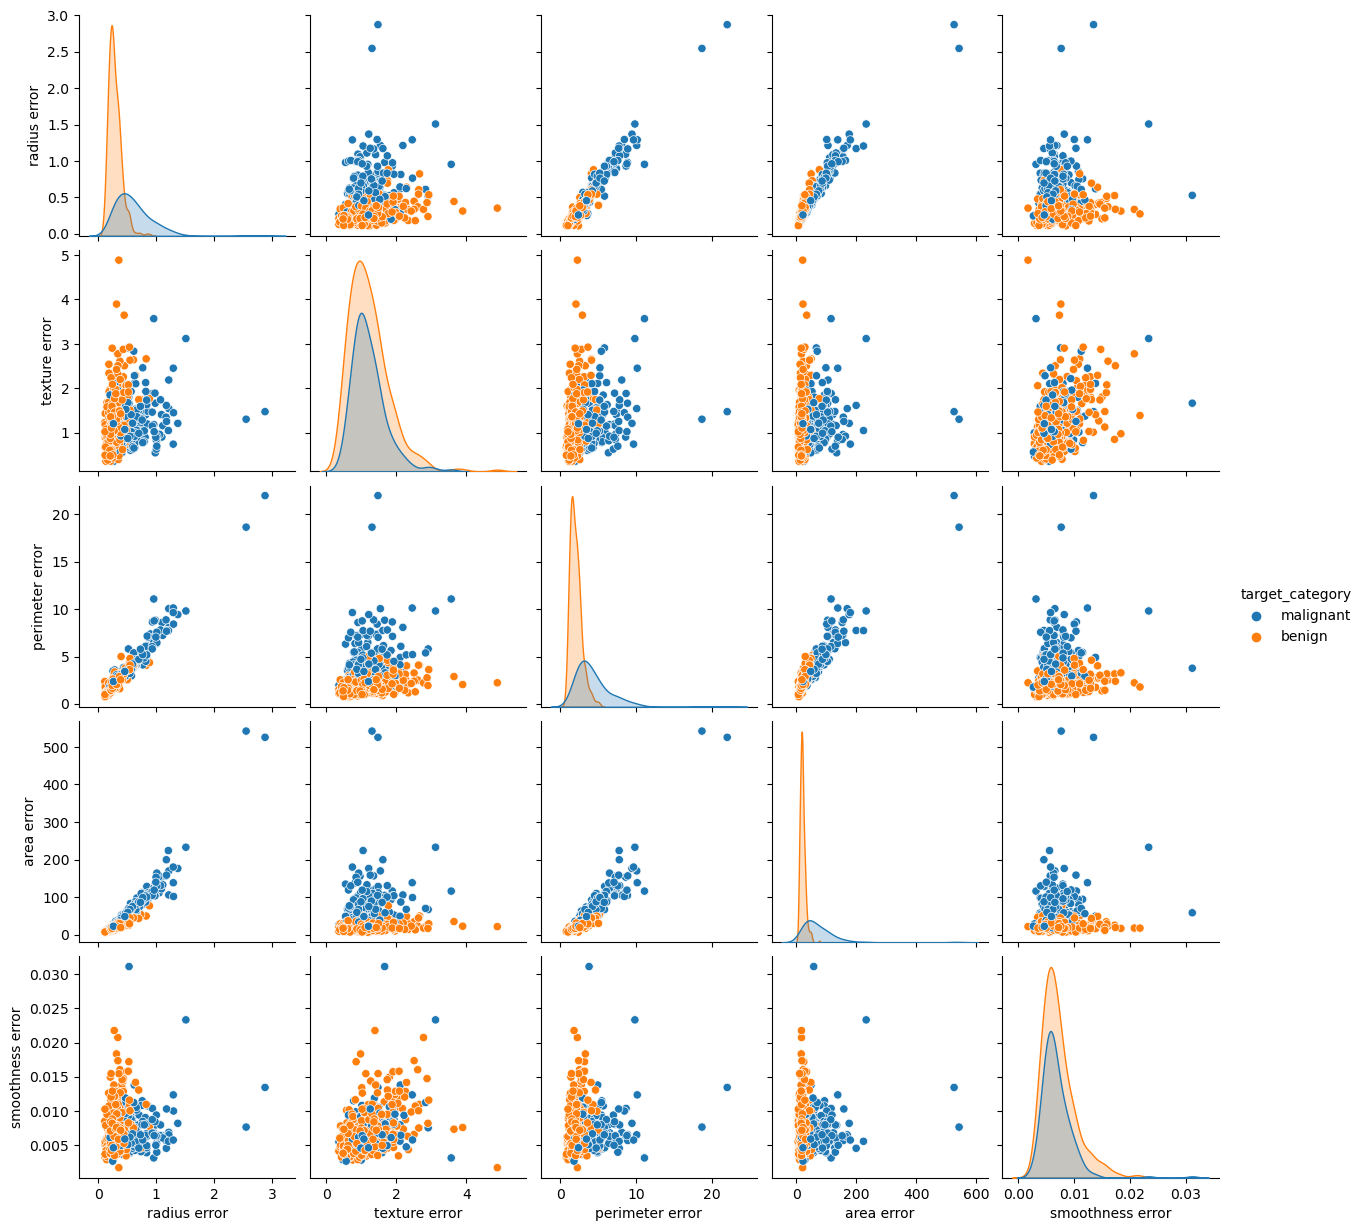

In [9]:
sns.pairplot(
    bcd[['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'target_category']],
    hue='target_category')

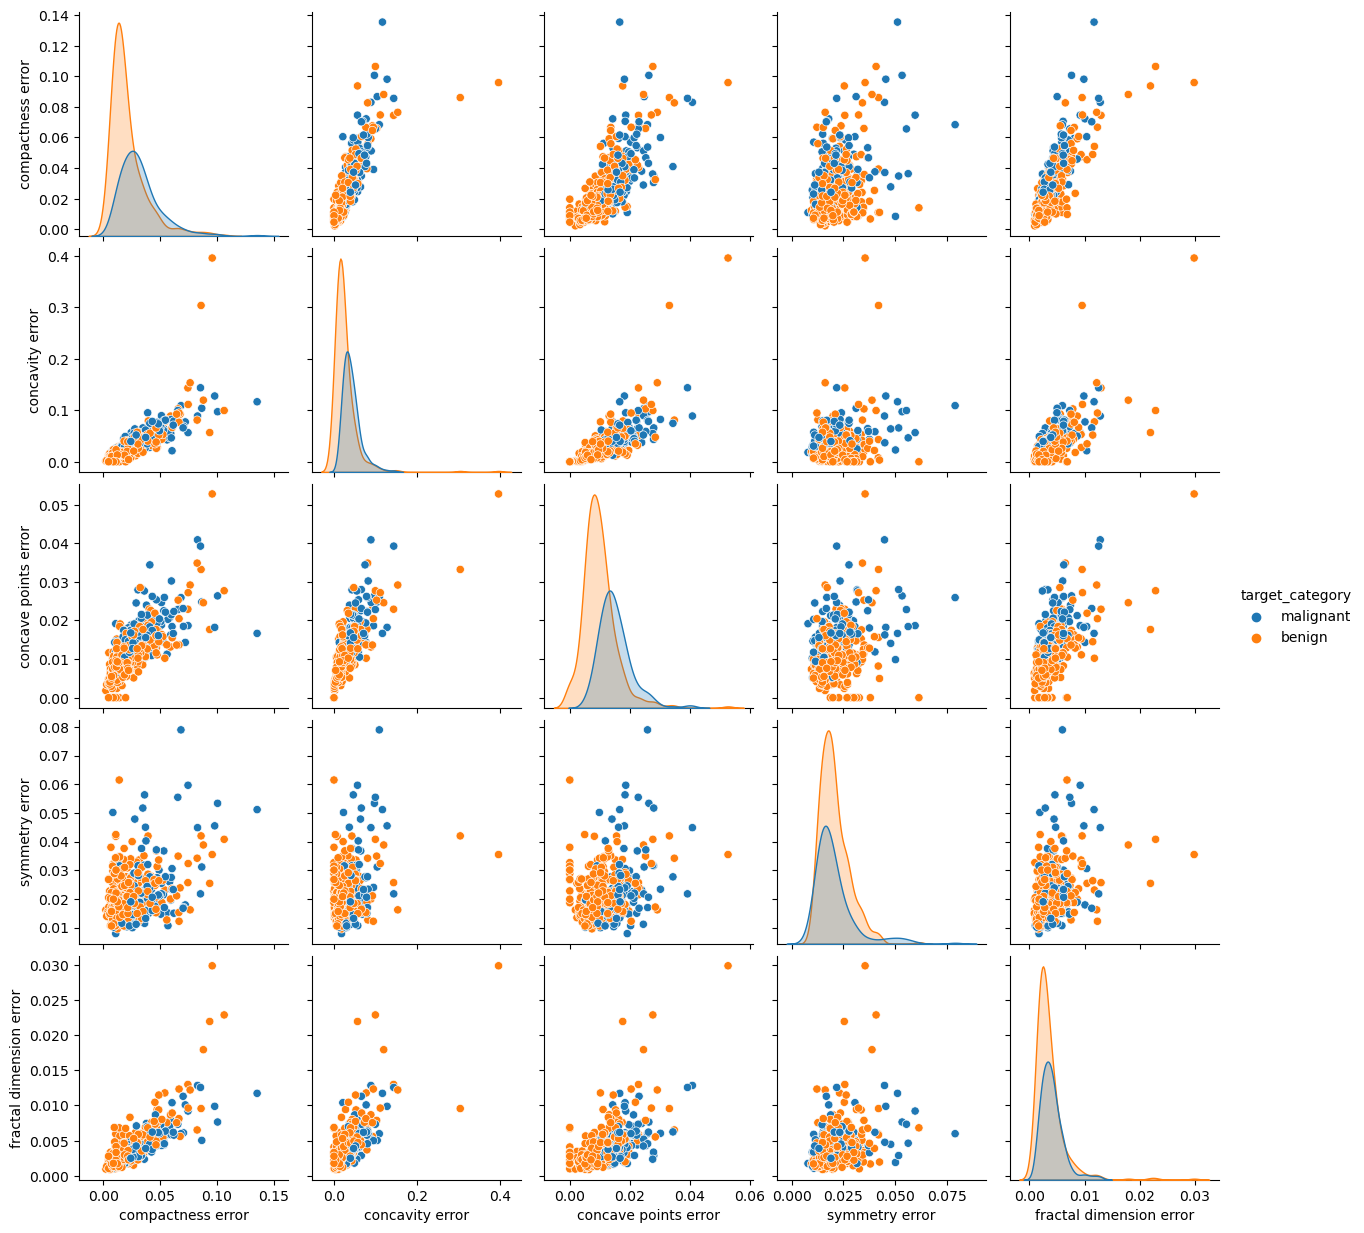

In [10]:
sns.pairplot(
    bcd[['compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'target_category']],
    hue='target_category')

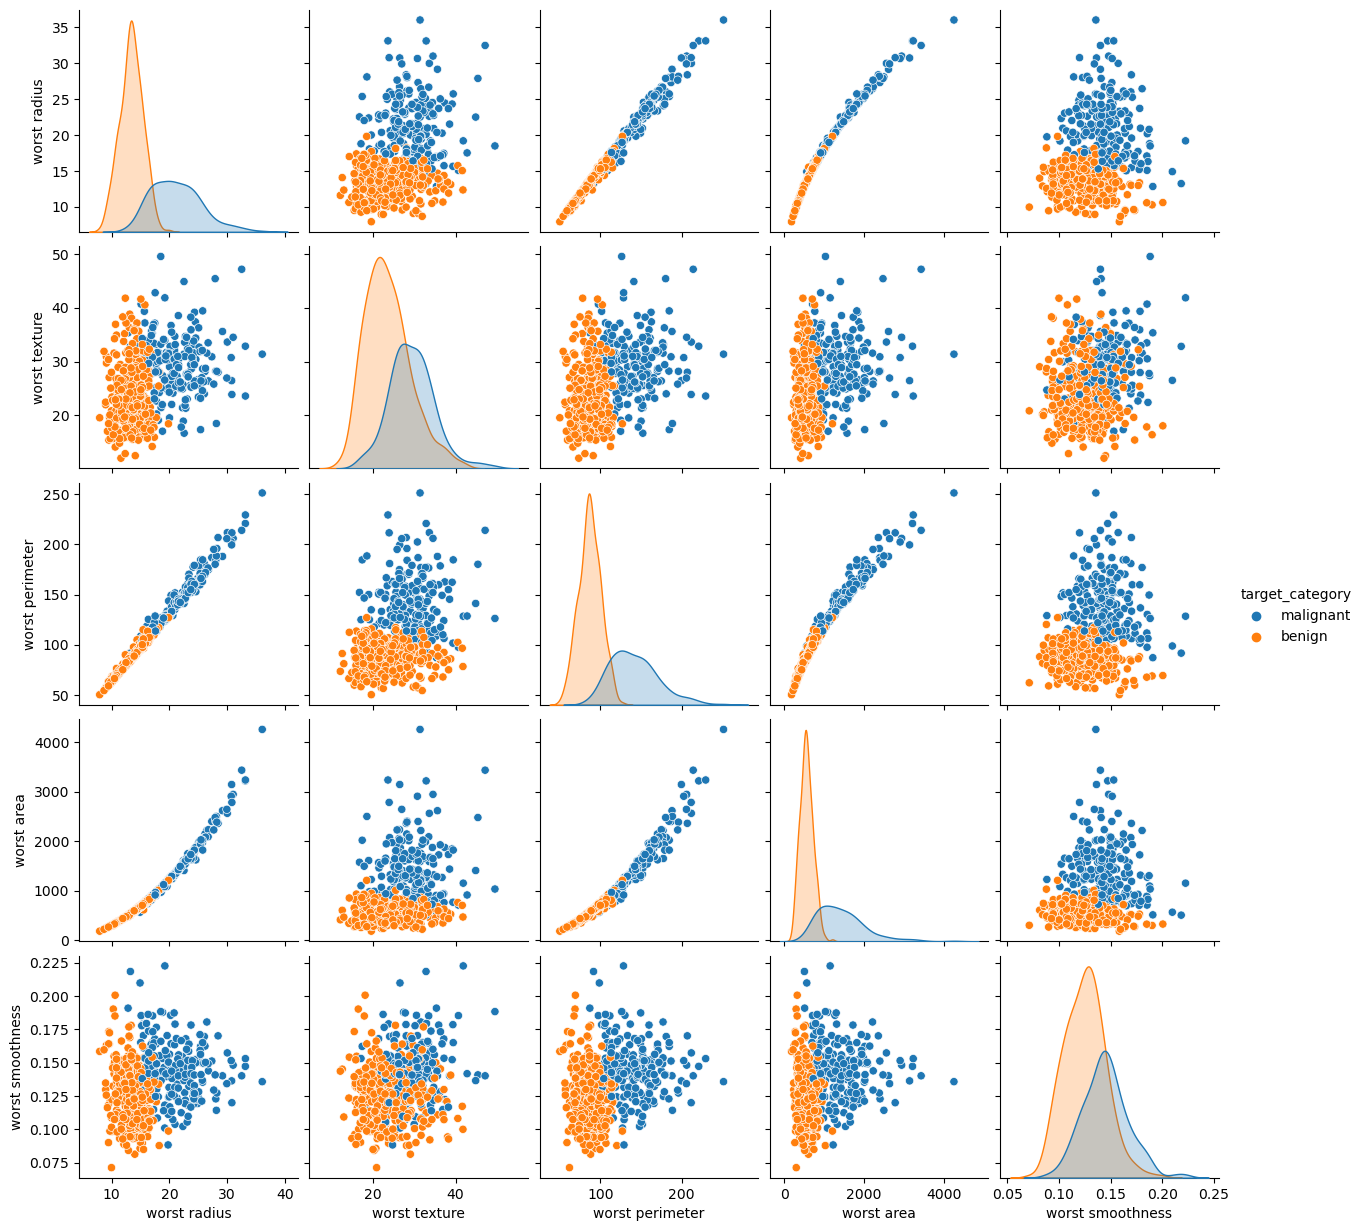

In [11]:
sns.pairplot(
    bcd[['worst radius', 'worst texture', 'worst perimeter', 'worst area','worst smoothness', 'target_category']],
    hue='target_category')

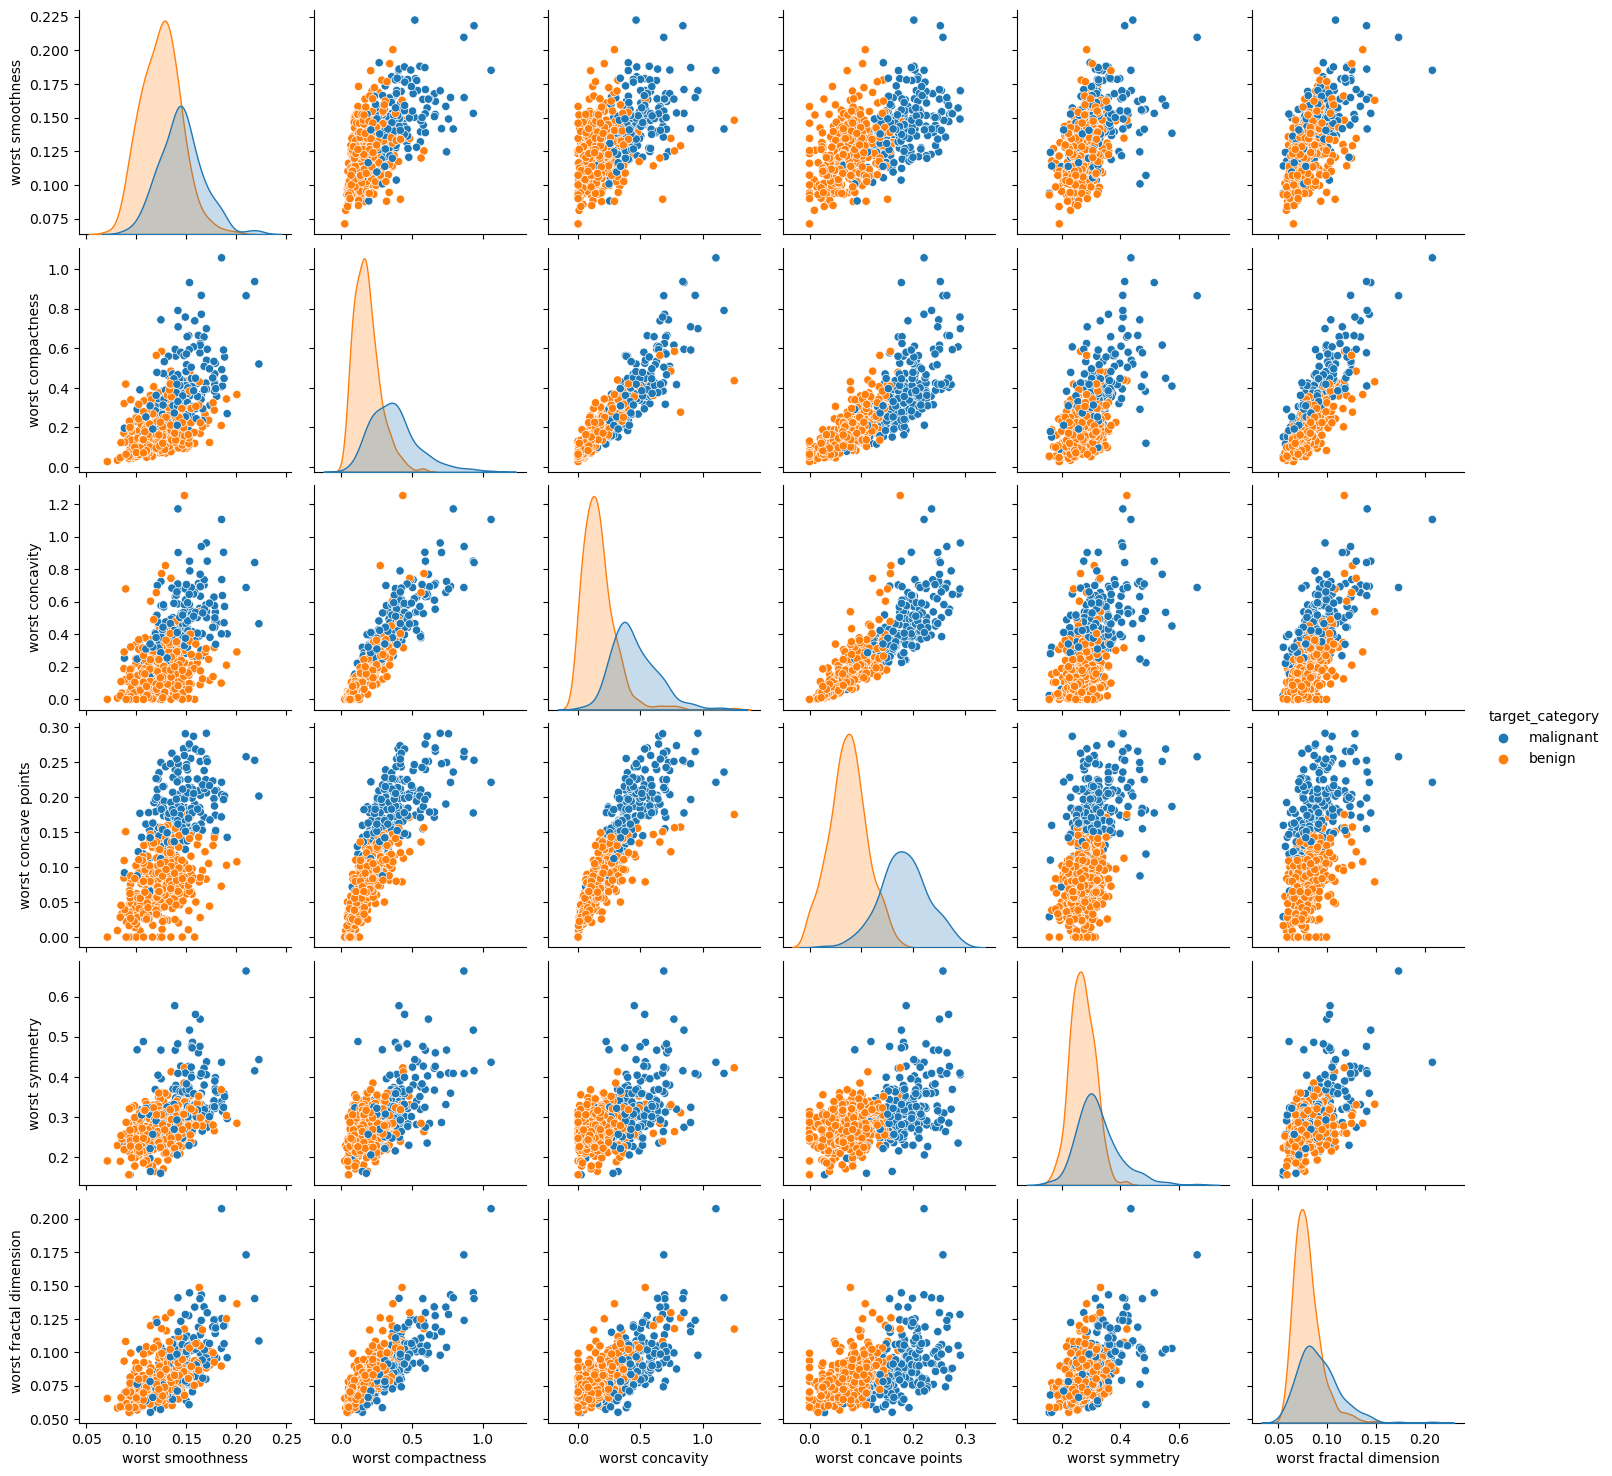

In [12]:
sns.pairplot(
    bcd[['worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target_category']],
    hue='target_category')

**Candidate for PCA?**

In [5]:
print('Correlation matrix for the breast cancer data:')
bcd[bcd.columns[0:-2]].corr()

Correlation matrix for the breast cancer data:


mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error            0.380676          0.642262        0.683260   
symmetry error                 

Some variables were highly correlated within this dataset, such as mean radius and mean perimeter (r=.998). Therefore, this dataset is a good candidate for PCA analysis, which will reduce it's dimensionality and hopefully improve model performance.

## First 2 variables:
I decided to use **worst radius** and **worst perimeter** after looking at the pairplots above. Each of these variables seemed to have disciminatory power by itself, and it seemed promising to use them in combination to accurately classify tumors.

As you can see below, there is a difference between benign and malignant tumors' worst radius and radius error. It seems that benign tumors typically have a smaller worst radius and a smaller radius error.


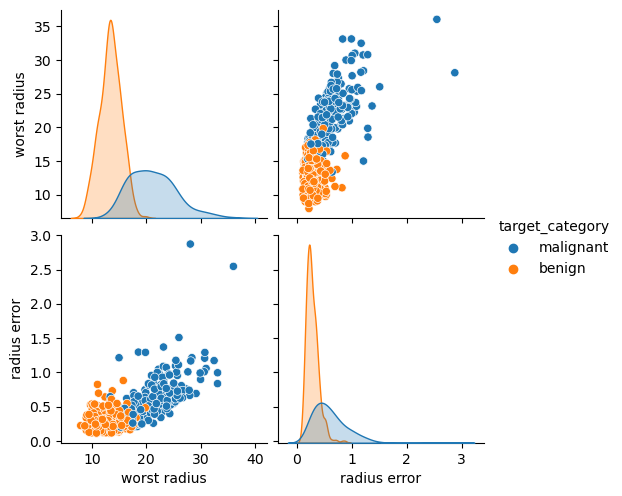

In [8]:
# plot them
print('As you can see below, there is a difference between benign and malignant tumors\' worst radius and radius error. '
     'It seems that benign tumors typically have a smaller worst radius and a smaller radius error.')
sns.pairplot(bcd[['worst radius', 'radius error', 'target_category']], hue='target_category')

In [9]:
# assign x and y
X = np.array(bcd[['worst radius', 'radius error']])
X_names = ['worst radius', 'radius error']
y = np.array(bcd[['target']]).ravel()

In [10]:
# split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

### SVM

In [11]:
# Create a Support Vector Machine (SVM) classifier, train it on the training data, and use it to classify tumors
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

This plot shows the decision boundary that was determined using the test data:


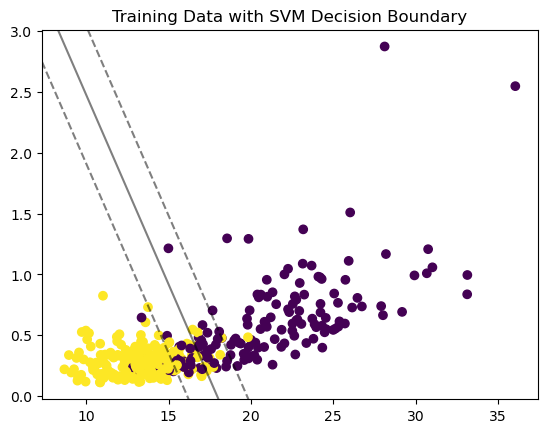

In [12]:
# Scatter plot of the test data showing the decision boundary
print('This plot shows the decision boundary that was determined using the test data:')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')

# Create the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

plt.title("Training Data with SVM Decision Boundary")
plt.show()

This plot displays the decision boundary that was determined using the test data mapped onto the test data. Tumors to the right of this line will generally be classified as malignant and vice versa. You can see where this model may inaccurately predict tumor type.


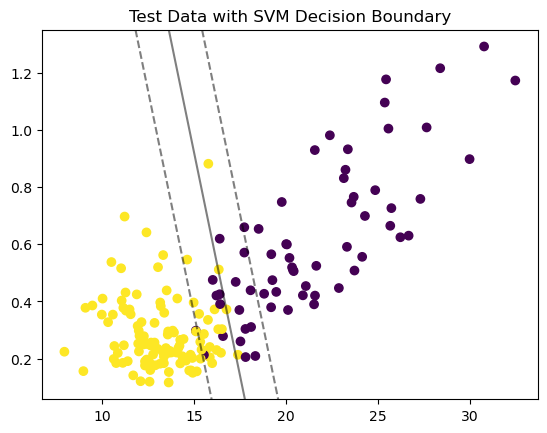

In [14]:
# Scatter plot of the test data showing the decision boundary
print('This plot displays the decision boundary that was determined using the test data mapped onto the test data.'
     ' Tumors to the right of this line will generally be classified as malignant and vice versa.' 
     ' You can see where this model may inaccurately predict tumor type.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')

# Create the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title("Test Data with SVM Decision Boundary")
plt.show()


Here is the actual classification of the test data, and where the SVM classifier inaccurately predicted the tumor's type.


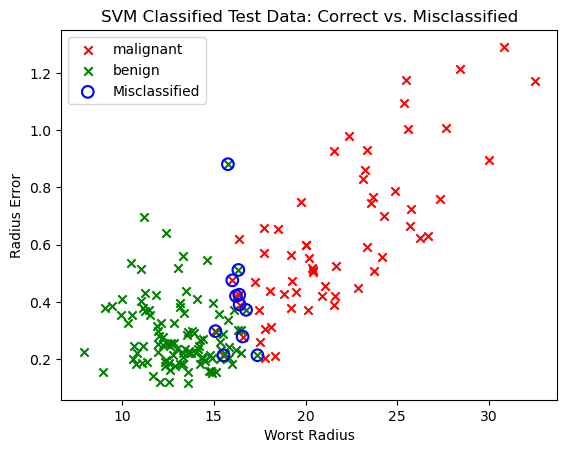

In [15]:
# plot the results
print('Here is the actual classification of the test data, and where the SVM classifier inaccurately predicted the '
     'tumor\'s type.')
# Scatter plot of the classified test data with mistakes as open symbols
colors = ['red', 'green']
diagnosis = ['malignant', 'benign']

# Plot all the predictions
for i, color, diagnosis in zip(range(2), colors, diagnosis):
    plt.scatter(X_test[y_test==i, 0], 
                X_test[y_test==i, 1], 
                color=color, marker='x', 
                label=diagnosis)

# Plot the misclassified points as open symbols
for i in range(2):
    plt.scatter(X_test[(y_test != y_pred) & (y_test == i), 0],
                X_test[(y_test != y_pred) & (y_test == i), 1], 
                marker='o', facecolors='none', 
                linewidths=1.5, edgecolors='blue', s=70,
                label='Misclassified' if i == 0 else None)

plt.xlabel("Worst Radius")
plt.ylabel("Radius Error")
plt.legend(loc="best")
plt.title("SVM Classified Test Data: Correct vs. Misclassified")
plt.show()

In [16]:
# Evaluate the classifier's performance
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print('Note: true labels are the rows and the predicted labels are the columns')
print(['malignant','benign'])
print(conf_matrix)

# Calculate and print the classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

Confusion matrix:
Note: true labels are the rows and the predicted labels are the columns
['malignant', 'benign']
[[ 56   7]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



The SVM did a great job at classifying tumors based on worst radius and radius error. It had high precision, recall, and f-1 score across malignant and benign tumors. However, the model struggled to correctly classify malignant tumors more than benign tumors. This means that some people with cancerous tumors would not be properly diagnosed when using this classifier, which could lead to life-threatening consequences. Ideally this model would perfectly classify tumors, but all things considered, it is a good candidate for our automated classification algorithm.

### Gaussian Naive Bayes

In [66]:
# Create a Gaussian Naive Bayes classifier, train it on the training data, and use it to classify the target
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

GaussianNB()

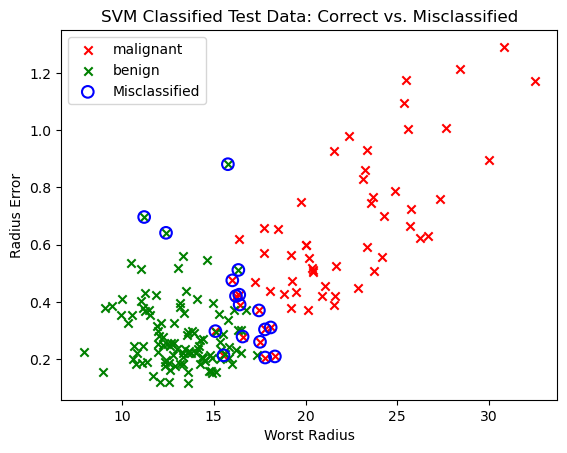

In [68]:
# plot the results
# Scatter plot of the classified test data with mistakes as open symbols
colors = ['red', 'green']
diagnosis = ['malignant', 'benign']

# Plot all the predictions
for i, color, diagnosis in zip(range(2), colors, diagnosis):
    plt.scatter(X_test[y_test==i, 0], 
                X_test[y_test==i, 1], 
                color=color, marker='x', 
                label=diagnosis)

# Plot the misclassified points as open symbols
for i in range(2):
    plt.scatter(X_test[(y_test != y_pred) & (y_test == i), 0],
                X_test[(y_test != y_pred) & (y_test == i), 1], 
                marker='o', facecolors='none', 
                linewidths=1.5, edgecolors='blue', s=70,
                label='Misclassified' if i == 0 else None)

plt.xlabel("Worst Radius")
plt.ylabel("Radius Error")
plt.legend(loc="best")
plt.title("GNB Classified Test Data: Correct vs. Misclassified")
plt.show()

In [69]:
# Evaluate the classifier's performance
conf_matrix = confusion_matrix(y_test, y_pred)
print('true labels are the rows and the predicted labels are the columns')
print(['malignant','benign'])
print(conf_matrix)

# Calculate and print the classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

true labels are the rows and the predicted labels are the columns
['malignant', 'benign']
[[ 50  13]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        63
           1       0.89      0.96      0.92       108

    accuracy                           0.90       171
   macro avg       0.91      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



The Gaussian Naive Bayes model did a pretty good job at classifying tumors based on worst radius and radius error, although it wasn't as good as the SVM model. The SVM model was as good as or better than the Gaussian Naive Bayes classifier according to all the performance metrics, including precision, recall, f-1 score, and accuracy. The Gaussian Naive Bayes classifier had the same weakness as the SVM classified because it struggled to correctly classify malignant tumors more than benign tumors.

Considering the SVM classifier outperformed the Gaussian Naive Bayes classifier across all metrics, the SVM classifier would be better to use as the automated screening algorithm. Before I can confidently make this recommendation though, I used PCA in combination with these 2 classifiers and evalauted their performance again.

## PCA

In my final analyses, I used PCA to confirm which model we should use for our automated screening algorithm. PCA is a technique used to reduce the dimensionality of a dataset when highly correlated variables present. Since highly correlated variables exist in the breast cancer dataset, I transformed it using PCA to determine the first and second principal component along which the variance of the data is maximized. Then I used a SVM and GNB classifier again to see which model performed better at classifying tumors when using the principal components.

In [17]:
# assign X and y
X = np.array(bcd[bcd.columns[0:-2]])
feature_names = bcd.columns[0:-2]
y = np.array(bcd[['target']]).ravel()

In [18]:
pca = PCA(n_components=2)

In [19]:
X_pca = pca.fit_transform(X)

In [20]:
# split X and y
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

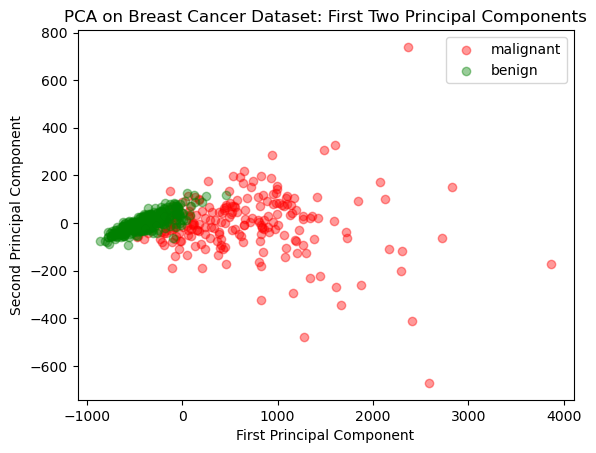

In [22]:
# Scatter plot of the first two principal components 
# with color coding for species
colors = ['red', 'green']
diagnosis = ['malignant', 'benign']

for i, color, target_name in zip(range(2), colors, diagnosis):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
                color=color, alpha=.4, label=target_name)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("PCA on Breast Cancer Dataset: First Two Principal Components")
plt.show()

### SVM

In [23]:
# Create a Support Vector Machine (SVM) classifier and train it on the training data
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

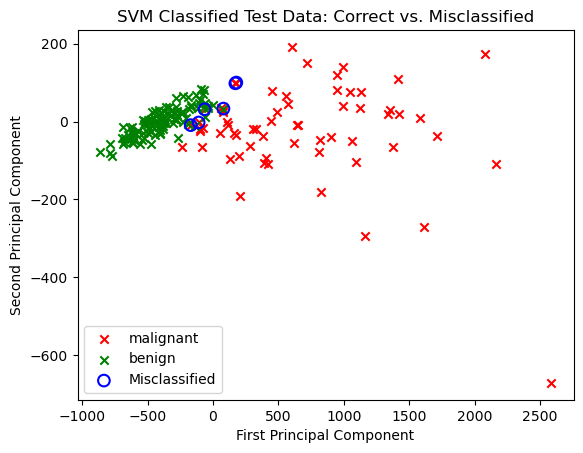

In [24]:
# plot the results
# Scatter plot of the classified test data with mistakes as open symbols
colors = ['red', 'green']
diagnosis = ['malignant', 'benign']

# Plot all the predictions
for i, color, diagnosis in zip(range(2), colors, diagnosis):
    plt.scatter(X_test[y_test==i, 0], 
                X_test[y_test==i, 1], 
                color=color, marker='x', 
                label=diagnosis)

# Plot the misclassified points as open symbols
for i in range(2):
    plt.scatter(X_test[(y_test != y_pred) & (y_test == i), 0],
                X_test[(y_test != y_pred) & (y_test == i), 1], 
                marker='o', facecolors='none', 
                linewidths=1.5, edgecolors='blue', s=70,
                label='Misclassified' if i == 0 else None)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("SVM Classified Test Data: Correct vs. Misclassified")
plt.show()

In [25]:
# Evaluate the classifier's performance
conf_matrix = confusion_matrix(y_test, y_pred)
print('true labels are the rows and the predicted labels are the columns')
print(['malignant','benign'])
print(conf_matrix)

# Calculate and print the classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

true labels are the rows and the predicted labels are the columns
['malignant', 'benign']
[[ 58   5]
 [  1 107]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



The SVM classifier performed very well again, even better than when I selected 2 features to train the model on above. This time, the model only made 6 mistakes (96% accuracy) in comparison to 11 mistakes before (94% accuracy). It had higher precision, recall, and f-1 score this time too. It's important to note that the algorithm still isn't perfect though. Unfortunately, there are still 5 people with cancer who weren't properly diagnosed, and 1 person was inaccurately diagnosed with cancer. 

### Gaussian Naive Bayes

In [26]:
# Create a Gaussian Naive Bayes classifier, train it on the training data, and use it to classify the target
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

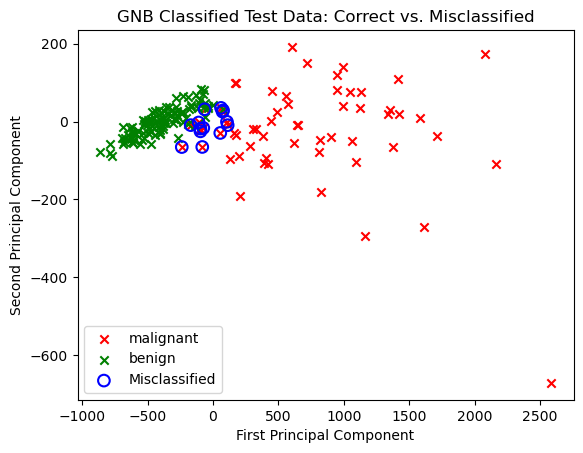

In [27]:
# plot the results
# Scatter plot of the classified test data with mistakes as open symbols
colors = ['red', 'green']
diagnosis = ['malignant', 'benign']

# Plot all the predictions
for i, color, diagnosis in zip(range(2), colors, diagnosis):
    plt.scatter(X_test[y_test==i, 0], 
                X_test[y_test==i, 1], 
                color=color, marker='x',
                label=diagnosis)

# Plot the misclassified points as open symbols
for i in range(2):
    plt.scatter(X_test[(y_test != y_pred) & (y_test == i), 0],
                X_test[(y_test != y_pred) & (y_test == i), 1], 
                marker='o', facecolors='none', 
                linewidths=1.5, edgecolors='blue', s=70,
                label='Misclassified' if i == 0 else None)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("GNB Classified Test Data: Correct vs. Misclassified")
plt.show()

In [28]:
# Evaluate the classifier's performance
conf_matrix = confusion_matrix(y_test, y_pred)
print('true labels are the rows and the predicted labels are the columns')
print(['malignant','benign'])
print(conf_matrix)

# Calculate and print the classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

true labels are the rows and the predicted labels are the columns
['malignant', 'benign']
[[ 49  14]
 [  0 108]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        63
           1       0.89      1.00      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171



The GNB classifier performed reasonably well after using PCA, although not as well as the SVM classifier. It did perform negligibly better on some metrics, like precision for malignant tumors (1 compared to .98) and recall for benign tumors (1 compared to .99), but it performed worse on every other metric. Most importantly, 14 people with cancer weren't diagnosed by this model, a weakness indicated by the model's lower recall for malignant tumors (recall=.78 compared to .92 for the SVM above). Furthermore, the SVM classifier had lower f-1 scores. The f-1 score combines precision and recall into one metric, and is a great measure to reference when you want to balance precision and recall, which we want to do. Therefore, I still recommend using the SVM classifier over the GNB classifier for our automated classification algorithm since it performed better in both scenarios (using 2 promising variables or PCA).

# Conclusion

After assessing the performance of a SVM and GNB classifier across both scenarios (one where I picked 2 variables with discriminatory power and one where I used PCA), I conclude that **the SVM classifier in combination with PCA would be best to use for our automated screening algorithm.** It does the best job of accurately predicting tumor types while maximizing the proportion of people with cancer who are diagnosed with cancer and minimizing the people without cancer who are diagnosed with cancer.